In [1]:
import pandas as pd
import numpy as np
from itertools import chain
from ast import literal_eval
import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## Trying TSNE to look for visualisation

In [24]:
embeddings = pd.read_csv('embeddings_test.csv', usecols=['embeddings','family_id'], index_col=False,converters={'embeddings': literal_eval})

In [25]:
embeddings

,embeddings,family_id
0,"[0.7124780416488647, 0.78122878074646, 1.12151...",425
1,"[1.0682826042175293, 0.6823692321777344, 1.113...",601
2,"[0.6104856729507446, 1.0229648351669312, 0.710...",598
3,"[0.7736867070198059, 0.562134325504303, 0.5773...",415
4,"[0.8705348372459412, 0.7440841794013977, 0.621...",339
...,...,...
6262,"[1.5576567649841309, 3.1235618591308594, 1.866...",708
6263,"[0.7692774534225464, 0.5895674228668213, 0.930...",929
6264,"[0.9186235070228577, 0.6903350353240967, 0.311...",101
6265,"[0.9006897211074829, 2.3924455642700195, 1.512...",165


In [26]:
embeddings_list = pd.DataFrame(list(embeddings.iloc[:,0]))

In [27]:
embeddings_list['FID'] = embeddings['family_id']
embeddings_list.sort_values(by='FID', inplace=True)
embeddings_list.reset_index(drop=True, inplace=True)

In [28]:
embeddings_list.to_csv('/home/mishra.g/thesis/code/SimCLR-Faces/embeddings_test.csv', index=False)

In [107]:
!pwd

/home/mishra.g/thesis/code/SimCLR-Faces


In [45]:
tsne = TSNE()
tsne_components = tsne.fit_transform(embeddings_list)

/home/mishra.g/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/mishra.g/.local/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [47]:
tsne_components = pd.DataFrame(tsne_components)

In [49]:
tsne_components['family_ID'] = embeddings['family_id']

In [53]:
tsne_components.sort_values(by='family_ID', inplace=True)

In [77]:
tsne_components.reset_index(inplace=True, drop=True)

In [78]:
tsne_components

,0,1,family_ID
0,-37.906223,20.326406,1
1,69.847542,-10.289249,1
2,-57.373970,31.492249,1
3,-56.971218,4.605709,1
4,19.899782,60.121506,1
...,...,...,...
15840,52.884983,13.831012,1018
15841,50.602329,19.469469,1018
15842,4.258468,-19.474216,1018
15843,13.320820,43.837078,1018


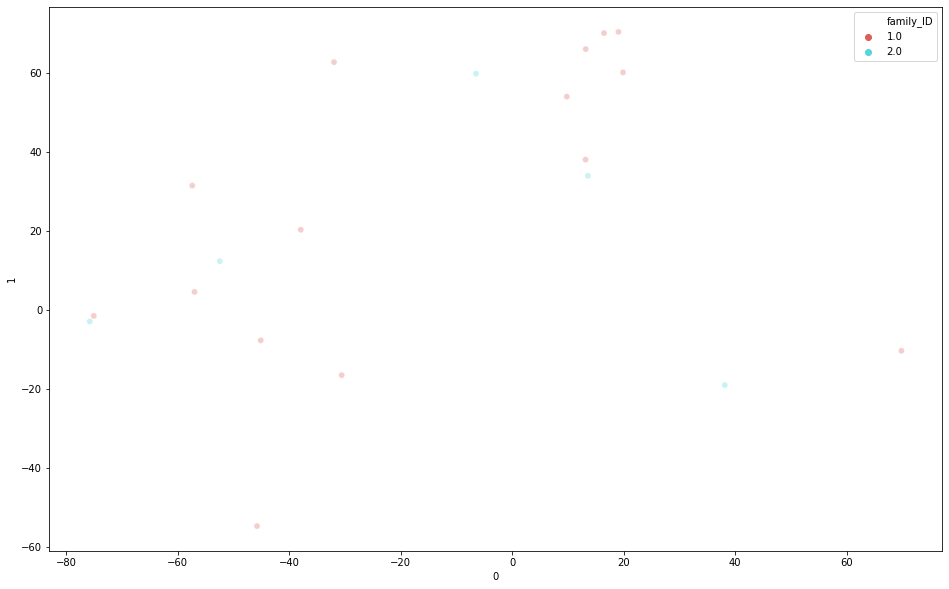

In [99]:
#df_subset['tsne-2d-one'] = tsne_components.iloc[:,0]
#df_subset['tsne-2d-two'] = tsne_components.iloc[:,1]

df_subset = tsne_components.iloc[0:20,:]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_components.iloc[:,0], y=tsne_components.iloc[:,1],
    hue="family_ID",
    palette=sns.color_palette("hls", 2),
    data=tsne_components[0:20],
    legend="full",
    alpha=0.3
)

It appears that the embeddings learnt through TSNE are not grouping family members together. Next step is to look at family clusters

## Trying to find cluster center and then using distance metrics to find which family center is closest to the test image

In [25]:
a = deque()

In [26]:
a.append(5)
a.appendleft(6)
a.append(7)
a

deque([6, 5, 7])

In [27]:
a.pop()

7

In [37]:
graph = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}

In [40]:
from collections import deque
def bfs(graph, node): #Node is where you want to start searching
    visited = []
    q = deque()
    
    visited.append(node)
    q.append(node)
    
    while q:
        cur = q.popleft()
        print(cur, end=" ")
        
        for neighbor in graph[cur]:
            if neighbor not in visited:
                visited.append(neighbor)
                q.append(neighbor)
        
    
bfs(graph, 'A')

A C 

In [32]:
q = deque()
q.append(5)
q.append(6)
q.append(7)

q


deque([5, 6, 7])

In [35]:
q.popleft()

5

In [41]:
def dfs(graph, node):
    
    visited =[]
    stack = deque()
    
    visited.append(node)
    stack.append(node)
    
    while stack:
        cur = stack.pop()
        print(cur, end = ' ')
        for neighbor in reversed(graph[cur]):
            if neighbor not in visited:
                visited.append(neighbor)
                stack.append(neighbor)
                
                
            

In [58]:
dfs(graph, "A")

A B D E F C 

In [59]:
visited = []
def dfs_recursive(graph, node):
    stack = deque()
    if node in visited:
        return
    
    visited.append(node)
    print(node, end = " ")
    for neighbor in graph[node]:
        if neighbor not in visited:
            visited.append(node)
            dfs_recursive(graph, neighbor)

In [60]:
dfs_recursive(graph, "A")

A B D E F C 

In [61]:
graph

{'A': ['B', 'C'], 'B': ['D', 'E'], 'C': ['F'], 'D': [], 'E': ['F'], 'F': []}

In [3]:
dir = '/home/mishra.g/thesis/data/T-1/all_images/train_list.csv'
filelist = pd.read_csv(dir)
filelist

,0,1
0,/home/mishra.g/thesis/data/T-1/all_images/trai...,581
1,/home/mishra.g/thesis/data/T-1/all_images/trai...,832
2,/home/mishra.g/thesis/data/T-1/all_images/trai...,80
3,/home/mishra.g/thesis/data/T-1/all_images/trai...,921
4,/home/mishra.g/thesis/data/T-1/all_images/trai...,856
...,...,...
14618,/home/mishra.g/thesis/data/T-1/all_images/trai...,278
14619,/home/mishra.g/thesis/data/T-1/all_images/trai...,2
14620,/home/mishra.g/thesis/data/T-1/all_images/trai...,87
14621,/home/mishra.g/thesis/data/T-1/all_images/trai...,623


In [18]:
filelist[filelist.iloc[:,1]==1].sample().iloc[0,0]

'/home/mishra.g/thesis/data/T-1/all_images/train/F0001_MID1_P00003_face0.jpg'

In [51]:
import torch
import torchvision
from PIL import Image


In [52]:
fids = [322,  200,  600,  990]

In [86]:
dir = '/home/mishra.g/thesis/data/T-1/all_images/train_list.csv'
filelist = pd.read_csv(dir)
#size = (args.batch_size, 3, args.image_size[0], args.image_size[1])
size = (4, 3, 108, 124)

convert_tensor = torchvision.transforms.ToTensor()
resize_tensor = torchvision.transforms.Resize(size=(108,124))
x_j = torch.empty(size)

for index, i in enumerate(fids):
    image = convert_tensor(resize_tensor(Image.open(filelist[filelist.iloc[:,1]==i].sample().iloc[0,0])))
    
    x_j[index,:,:,:] = image
    print(index,i)
#return x_j

0 322
1 200
2 600
3 990


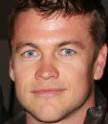

In [85]:
Image.open(filelist[filelist.iloc[:,1]==322].sample().iloc[0,0])

In [93]:
filelist[filelist.iloc[:,1]==322].sample().iloc[0,0]

'/home/mishra.g/thesis/data/T-1/all_images/train/F0322_MID1_P03407_face0.jpg'